#### Importing Libraries

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet #For forecasting(prediction)

#### Importing datasets 

In [179]:
july12_df = pd.read_csv('07-12-2020.csv')
csse_df = pd.read_csv('csse_daily.csv')
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df= pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [180]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,858
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,346,346,346,386,386,396,458,462,506,525


In [181]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,826,864,898,920,936,957,971,994,1010,1012
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,74,76,79,81,83,83,85,89,93,95
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,946,952,959,968,978,988,996,1004,1011,1018
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19,19,19,21,21,22,23,23,26,26


In [182]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,800,800,800,800,802,802,803,803,803,803
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,108,108,108,117,117,117,117,118,118,118


In [183]:
print(confirmed_df.shape)
print(recovered_df.shape)
print(deaths_df.shape)

(266, 178)
(253, 178)
(266, 178)


In [184]:
# extract dates
dates = confirmed_df.columns[4:]

# melting dataframes
confirmed_df= confirmed_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

deaths_df = deaths_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')

recovered_df = recovered_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')




print(confirmed_df.shape)
print(deaths_df.shape)
print(recovered_df.shape)

(46284, 6)
(46284, 6)
(44022, 6)


In [185]:
# merging dataframes


merged = pd.merge(left=confirmed_df, right=deaths_df, how='left',
                      on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])
merged = pd.merge(left=merged, right=recovered_df, how='left',
                      on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])

merged.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0,0.0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0,0.0


In [186]:
# Converting to proper date format
merged['Date'] = pd.to_datetime(merged['Date'])

# filling na with 0
merged['Recovered'] = merged['Recovered'].fillna(0)

# converting to int datatype
merged['Recovered'] = merged['Recovered'].astype('int')

In [187]:
merged.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0


In [188]:
merged.isnull().sum()

Province/State    32190
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [189]:
# Active Cases = confirmed - deaths - recovered
merged['Active'] = merged['Confirmed'] - merged['Deaths'] - merged['Recovered']

In [190]:
merged[['Province/State']] = merged[['Province/State']].fillna('')

In [191]:
# filling missing numerical values with 0
cols = ['Confirmed', 'Deaths', 'Recovered', 'Active']
merged[cols] = merged[cols].fillna(0)

In [192]:
merged.isnull().sum() #Null values Removed

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
dtype: int64

In [193]:
merged.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int32
Active                     int64
dtype: object

In [194]:
merged.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0
1,,Albania,41.15330,20.168300,2020-01-22,0,0,0,0
2,,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0
3,,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0
4,,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0


In [195]:
#Calculating mortality rate
merged['Mortality_rate'] =  merged['Deaths']/merged['Confirmed']

In [196]:
merged.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Mortality_rate
46279,,Sao Tome and Principe,0.186400,6.613100,2020-07-13,732,14,286,432,0.019126
46280,,Yemen,15.552727,48.516388,2020-07-13,1498,424,675,399,0.283044
46281,,Comoros,-11.645500,43.333300,2020-07-13,317,7,296,14,0.022082
46282,,Tajikistan,38.861000,71.276100,2020-07-13,6596,55,5278,1263,0.008338
46283,,Lesotho,-29.610000,28.233600,2020-07-13,245,3,33,209,0.012245


In [197]:
#Calculating Recovery Rate
merged['Recovery_rate'] =  merged['Recovered']/merged['Confirmed']

In [198]:
merged.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Mortality_rate,Recovery_rate
0,,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,NaN,NaN
1,,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,NaN,NaN
2,,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,NaN,NaN
3,,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,NaN,NaN
4,,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,NaN,NaN


In [199]:
merged.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Mortality_rate,Recovery_rate
46279,,Sao Tome and Principe,0.186400,6.613100,2020-07-13,732,14,286,432,0.019126,0.390710
46280,,Yemen,15.552727,48.516388,2020-07-13,1498,424,675,399,0.283044,0.450601
46281,,Comoros,-11.645500,43.333300,2020-07-13,317,7,296,14,0.022082,0.933754
46282,,Tajikistan,38.861000,71.276100,2020-07-13,6596,55,5278,1263,0.008338,0.800182
46283,,Lesotho,-29.610000,28.233600,2020-07-13,245,3,33,209,0.012245,0.134694


In [200]:
top = merged[merged['Date'] == merged['Date'].max()]
world = top.groupby('Country/Region')['Confirmed','Active','Deaths','Recovered'].sum().reset_index()
world.head()

,Country/Region,Confirmed,Active,Deaths,Recovered
0,Afghanistan,34455,12189,1012,21254
1,Albania,3571,1462,95,2014
2,Algeria,19689,4652,1018,14019
3,Andorra,858,3,52,803
4,Angola,525,381,26,118


In [201]:
world_cases = world['Confirmed'].sum()

In [202]:
world_cases

13104391

In [203]:
total_avtive = world['Active'].sum()

In [204]:
total_avtive

5370381

In [205]:
total_deaths = world['Deaths'].sum()

In [206]:
total_deaths 

573003

In [207]:
world_recovered = world['Recovered'].sum()

In [208]:
world_recovered

7161007

## Graphing the number of confirmed cases, active cases, deaths, recoveries, mortality rate (CFR), and recovery rate

In [209]:
data_time= merged.groupby(["Date"])[["Confirmed","Active","Recovered","Deaths","Mortality_rate","Recovery_rate"]].sum().reset_index().sort_values("Date",ascending=True).reset_index(drop=True)

In [210]:
#Plotting the graph of confirmed cases
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_time.index, y=data_time['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))


fig.update_layout(
    title='Confirmed cases over time',
        template='plotly_white',
      yaxis_title="Confirmed cases",
    xaxis_title="Days",

)

fig.show()

### <font color = green> Confirmed cases are rising up each passing day

###### For Bar Graph: 

In [211]:
top_confirmed = top.groupby(by='Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10).reset_index()

In [212]:
top_confirmed

,Country/Region,Confirmed
0,US,3364157
1,Brazil,1884967
2,India,906752
3,Russia,732547
4,Peru,330123
5,Chile,317657
6,Mexico,304435
7,United Kingdom,291691
8,South Africa,287796
9,Iran,259652


<IPython.core.display.Javascript object>

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

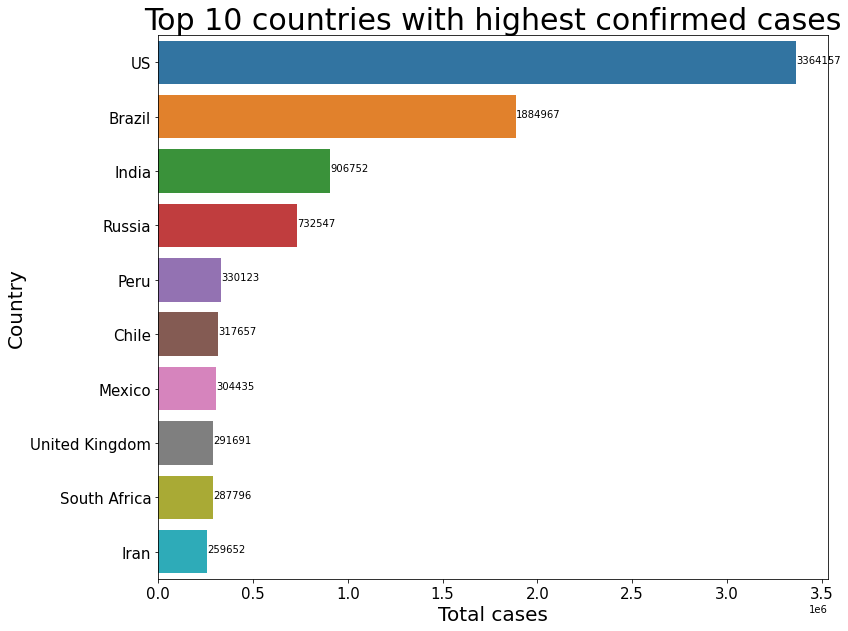

In [213]:
#Top 10 countries with highest confirmed cases(BAR GRAPH)
plt.figure(figsize=(12,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total cases',fontsize=20)
plt.ylabel('Country',fontsize=20)
plt.title('Top 10 countries with highest confirmed cases',fontsize =30)
ax = sns.barplot(x = top_confirmed.Confirmed,y=top_confirmed['Country/Region'])
for i, (value,name) in enumerate(zip(top_confirmed.Confirmed,top_confirmed['Country/Region'])):
    ax.text(value,i-.05,f'{value:.0f}',size=10,ha='left',va='center')
ax.set(xlabel='Total cases',ylabel='Country')

### <font color = green> USA is the most affected Country followed by Brazil and India

### Active Cases

In [214]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_time.index, y=data_time['Active'],
                    mode='lines',
                    name='Active cases'))


fig.update_layout(
    title='Active cases over time',
        template='plotly_white',
      yaxis_title="Active cases",
    xaxis_title="Days",

)

fig.show()

In [215]:
top_actives = top.groupby(by='Country/Region')['Active'].sum().sort_values(ascending=False).head(10).reset_index()

In [216]:
top_actives

,Country/Region,Active
0,US,2196652
1,Brazil,520883
2,India,311565
3,United Kingdom,245392
4,Russia,217957
5,South Africa,145383
6,Canada,101148
7,France,100886
8,Peru,97061
9,Bangladesh,86186


<IPython.core.display.Javascript object>

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

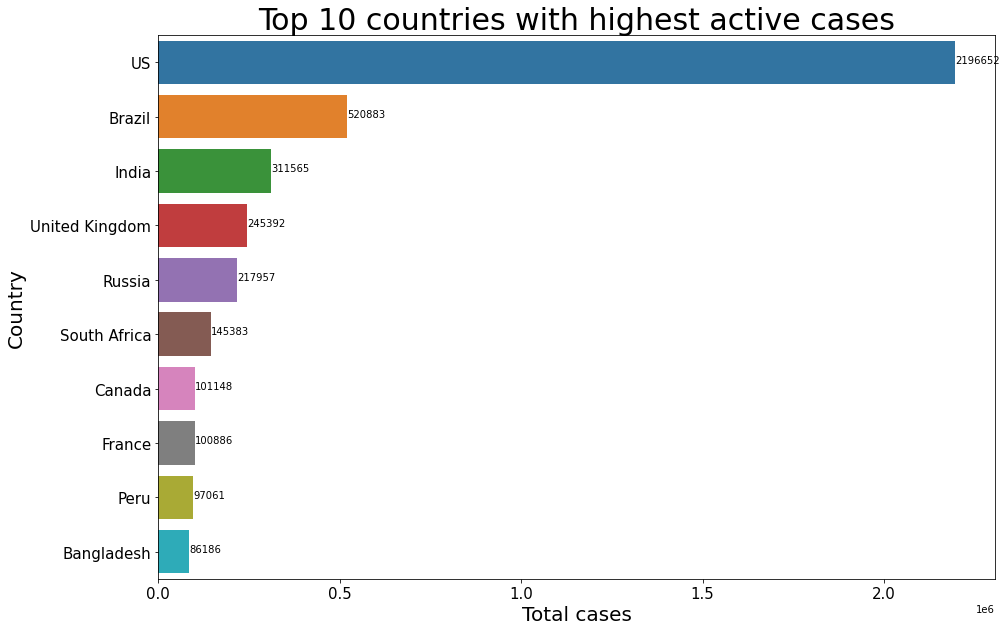

In [217]:
#Bar graph of Top 20 countries with highest Active Cases currently
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total cases',fontsize=20)
plt.ylabel('Country',fontsize=20)
plt.title('Top 10 countries with highest active cases',fontsize =30)
ax = sns.barplot(x = top_actives.Active,y=top_actives['Country/Region'])
for i, (value,name) in enumerate(zip(top_actives.Active,top_actives['Country/Region'])):
    ax.text(value,i-.05,f'{value:.0f}',size=10,ha='left',va='center')
ax.set(xlabel='Total cases',ylabel='Country')


### <font color = green> USA has highest active cases followed by Brazil and India

### Deaths:


In [218]:
# Deaths over time Graph world-wide
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_time.index, y=data_time['Deaths'],
                    mode='lines',
                    name='Deaths'))


fig.update_layout(
    title='Deaths over time',
        template='plotly_white',
      yaxis_title="Deaths",
    xaxis_title="Days",

)

fig.show()

######  For Bar Graph:

In [219]:
top_deaths = top.groupby(by='Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10).reset_index()

In [220]:
top_deaths

,Country/Region,Deaths
0,US,135566
1,Brazil,72833
2,United Kingdom,44915
3,Mexico,35491
4,Italy,34967
5,France,30032
6,Spain,28406
7,India,23727
8,Iran,13032
9,Peru,12054


<IPython.core.display.Javascript object>

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

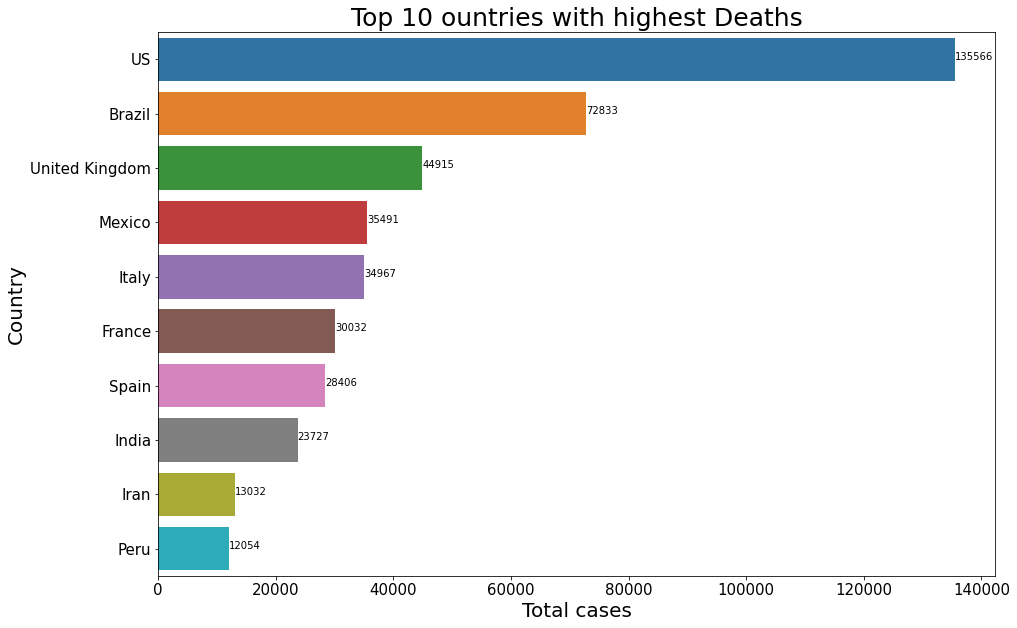

In [221]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total cases',fontsize=20)
plt.ylabel('Country',fontsize=20)
plt.title('Top 10 ountries with highest Deaths',fontsize =25)
ax = sns.barplot(x = top_deaths.Deaths,y=top_deaths['Country/Region'])
for i, (value,name) in enumerate(zip(top_deaths.Deaths,top_deaths['Country/Region'])):
    ax.text(value,i-.05,f'{value:.0f}',size=10,ha='left',va='center')
ax.set(xlabel='Total cases',ylabel='Country')


### <font color = green> USA has most number of deaths followed by Brazil and UK

### Recovered:

In [222]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_time.index, y=data_time['Recovered'],
                    mode='lines',
                    name='Recovered cases'))


fig.update_layout(
    title='Recovered cases over time',
        template='plotly_white',
      yaxis_title="Recovered cases",
    xaxis_title="Days",

)

fig.show()

In [223]:
top_recoveries = top.groupby(by='Country/Region')['Recovered'].sum().sort_values(ascending=False).head(10).reset_index()

In [224]:
top_recoveries

,Country/Region,Recovered
0,Brazil,1291251
1,US,1031939
2,India,571460
3,Russia,503168
4,Chile,286556
5,Mexico,240101
6,Iran,222539
7,Peru,221008
8,Turkey,195671
9,Italy,195106


<IPython.core.display.Javascript object>

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

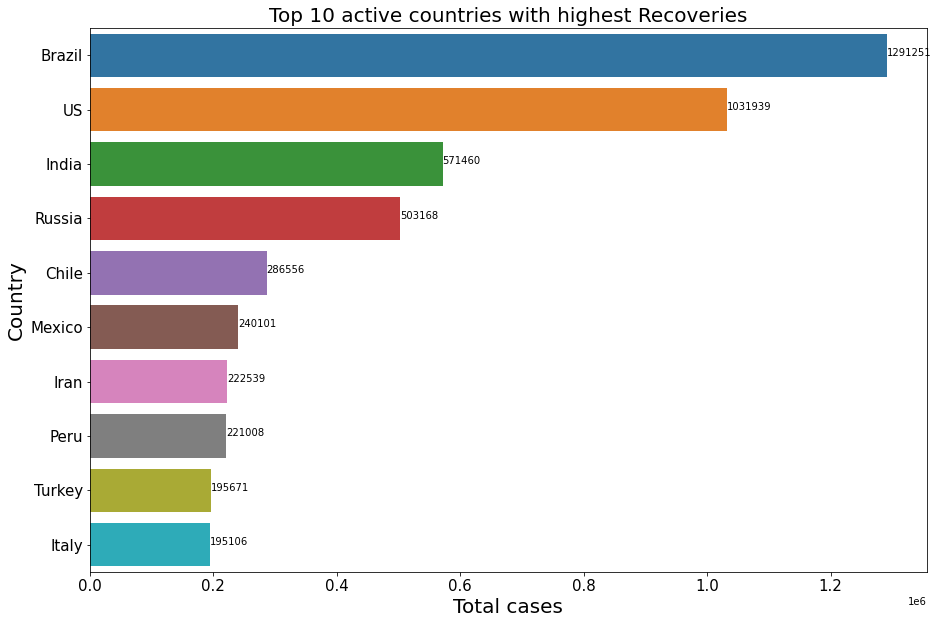

In [225]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total cases',fontsize=20)
plt.ylabel('Country',fontsize=20)
plt.title('Top 10 active countries with highest Recoveries',fontsize =20)
ax = sns.barplot(x = top_recoveries.Recovered,y=top_recoveries['Country/Region'])
for i, (value,name) in enumerate(zip(top_recoveries.Recovered,top_recoveries['Country/Region'])):
    ax.text(value,i-.05,f'{value:.0f}',size=10,ha='left',va='center')
ax.set(xlabel='Total cases',ylabel='Country')


### <Font color = green> Brazil has the highest recovered cases and Italy has the lowest 

### Mortality Rate: 

In [226]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_time.index, y=data_time['Mortality_rate'],
                    mode='lines',
                    name='Mortality Rate'))


fig.update_layout(
    title='Mortality Rate over time',
        template='plotly_white',
      yaxis_title="Mortality Rates",
    xaxis_title="Days",

)

fig.show()

In [227]:
top_mortality = top.groupby(by='Country/Region')['Mortality_rate'].sum().sort_values(ascending=False).head(10).reset_index()

In [228]:
top_mortality

,Country/Region,Mortality_rate
0,Canada,inf
1,United Kingdom,0.607876
2,Netherlands,0.380993
3,France,0.375569
4,China,0.354030
5,Yemen,0.283044
6,MS Zaandam,0.222222
7,Belgium,0.155995
8,Italy,0.143761
9,Hungary,0.140099


<IPython.core.display.Javascript object>

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Rate')]

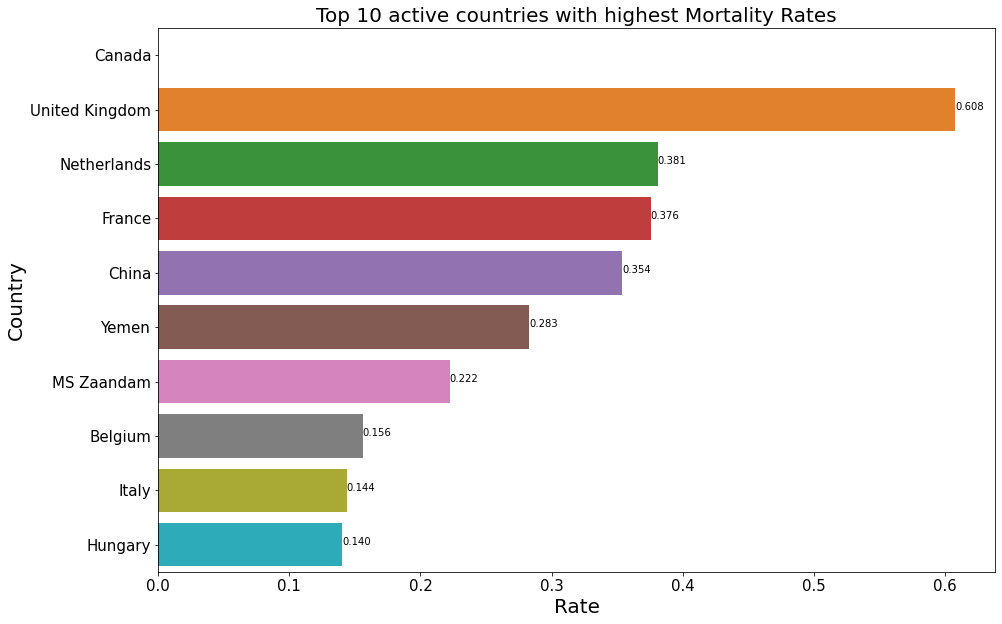

In [229]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Rate',fontsize=20)
plt.ylabel('Country',fontsize=20)
plt.title('Top 10 active countries with highest Mortality Rates',fontsize =20)
ax = sns.barplot(x = top_mortality.Mortality_rate,y=top_mortality['Country/Region'])
for i, (value,name) in enumerate(zip(top_mortality.Mortality_rate,top_mortality['Country/Region'])):
    ax.text(value,i-.05,f'{value:.3f}',size=10,ha='left',va='center')
ax.set(xlabel='Rate',ylabel='Country')


### <font color = green> UK has the highest Mortality rate 

#### Recovery Rates:


In [230]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_time.index, y=data_time['Recovery_rate'],
                    mode='lines',
                    name='Recovery Rate'))


fig.update_layout(
    title='Recovery Rate over time',
        template='plotly_white',
      yaxis_title="Recovery Rates",
    xaxis_title="Days",

)

fig.show()

In [231]:
top_recovery_rate = top.groupby(by='Country/Region')['Recovery_rate'].sum().sort_values(ascending=False).head(10).reset_index()

In [232]:
top_recovery_rate

,Country/Region,Recovery_rate
0,China,29.007680
1,United Kingdom,8.563921
2,France,8.123144
3,Australia,7.158827
4,Netherlands,3.710549
5,Denmark,2.930429
6,Holy See,1.000000
7,Dominica,1.000000
8,Iceland,0.984737
9,Malta,0.979228


<IPython.core.display.Javascript object>

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Rate')]

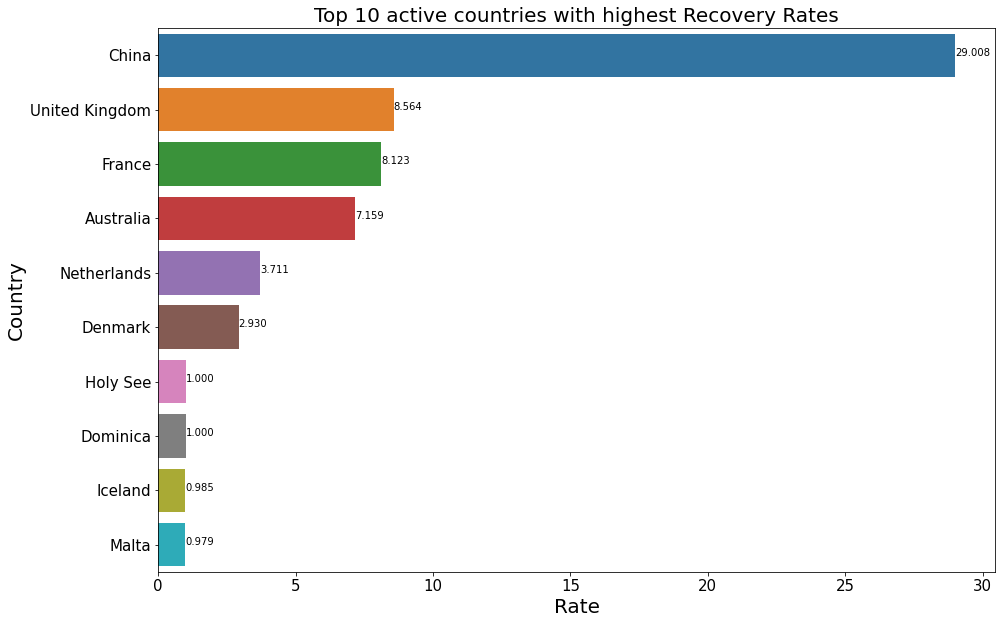

In [233]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Rate',fontsize=20)
plt.ylabel('Country',fontsize=20)
plt.title('Top 10 active countries with highest Recovery Rates',fontsize =20)
ax = sns.barplot(x = top_recovery_rate.Recovery_rate,y=top_recovery_rate['Country/Region'])
for i, (value,name) in enumerate(zip(top_recovery_rate.Recovery_rate,top_recovery_rate['Country/Region'])):
    ax.text(value,i-.05,f'{value:.3f}',size=10,ha='left',va='center')
ax.set(xlabel='Rate',ylabel='Country')


### <font color = green> China has the highest recovery rate followed by UK and France

## World Daily Increases in confirmed cases, confirmed deaths, confirmed recoveries (Graph)

In [234]:
data_over_time= merged.groupby(["Date"])[["Confirmed","Active","Recovered","Deaths"]].sum().reset_index().sort_values("Date",ascending=True).reset_index(drop=True)

In [235]:
fig = go.Figure(go.Bar(
            x=data_over_time['Date'],
            y=data_over_time['Confirmed'],
           ))
fig.update_layout(
    title='Daily Increase in confirmed cases',
    template='plotly_white',
     xaxis_title="Confirmed Cases",
    yaxis_title="Days",
)
fig.show()

In [236]:
fig = go.Figure(go.Bar(
            x=data_over_time['Date'],
            y=data_over_time['Active'],
    marker_color='rgb(253,187,132)'
           ))
fig.update_layout(
    title='Daily increase in active cases',
    template='plotly_white',
     xaxis_title="Active Cases",
    yaxis_title="Days",
)
fig.show()

In [237]:
fig = go.Figure(go.Bar(
            x=data_over_time['Date'],
            y=data_over_time['Recovered'],
    marker_color='rgb(178,24,43)'
           ))
fig.update_layout(
    title='Daily increase in recovered cases',
    template='plotly_white',
     xaxis_title="Recovered Cases",
    yaxis_title="Days",
)
fig.show()

## Log of cases over time, log of death over time, log of corona recoveries over time

In [238]:
Dates = data_over_time['Date']

In [239]:
Dates

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
169   2020-07-09
170   2020-07-10
171   2020-07-11
172   2020-07-12
173   2020-07-13
Name: Date, Length: 174, dtype: datetime64[ns]

In [240]:
conf = data_over_time['Confirmed']

In [241]:
conf

0           555
1           654
2           941
3          1434
4          2118
         ...   
169    12268518
170    12498467
171    12717908
172    12910357
173    13104391
Name: Confirmed, Length: 174, dtype: int64

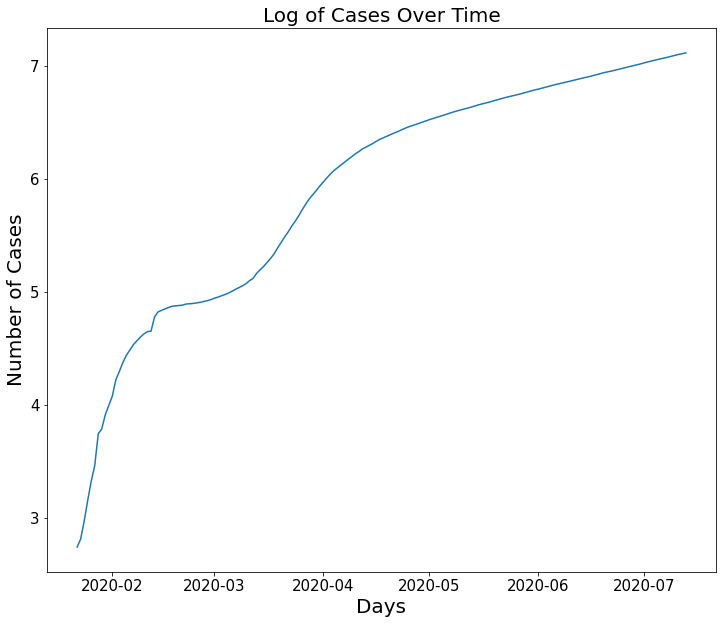

In [242]:
plt.figure(figsize=(12, 10))
plt.plot(Dates, np.log10(conf))
plt.title('Log of Cases Over Time', size=20)
plt.xlabel('Days', size=20)
plt.ylabel('Number of Cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [243]:
deaths = data_over_time['Deaths']

In [244]:
deaths

0          17
1          18
2          26
3          42
4          56
        ...  
169    554924
170    560209
171    565138
172    569128
173    573003
Name: Deaths, Length: 174, dtype: int64

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


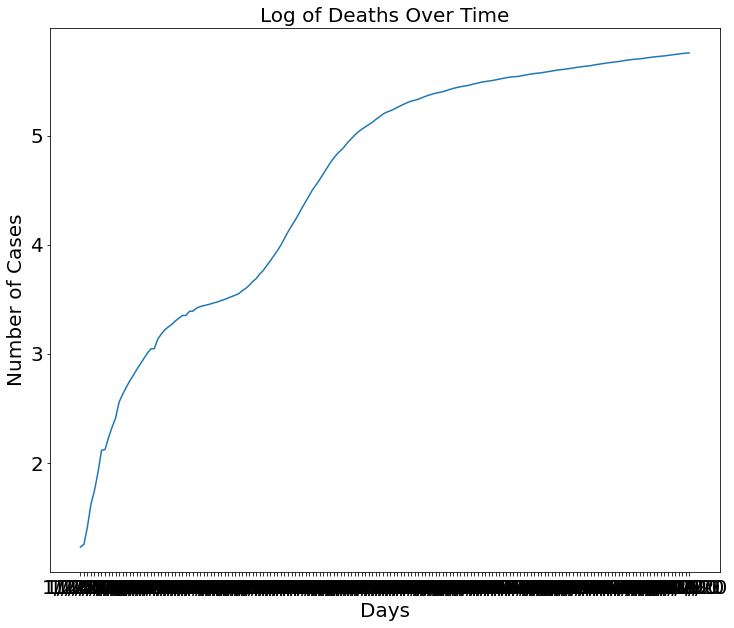

In [245]:
plt.figure(figsize=(12, 10))
plt.plot(dates, np.log10(deaths))
plt.title('Log of Deaths Over Time', size=20)
plt.xlabel('Days', size=20)
plt.ylabel('Number of Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [246]:
recover = data_over_time['Recovered']

In [247]:
recover

0           28
1           30
2           36
3           39
4           52
        ...   
169    6645735
170    6784677
171    6909710
172    7021163
173    7161007
Name: Recovered, Length: 174, dtype: int32

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


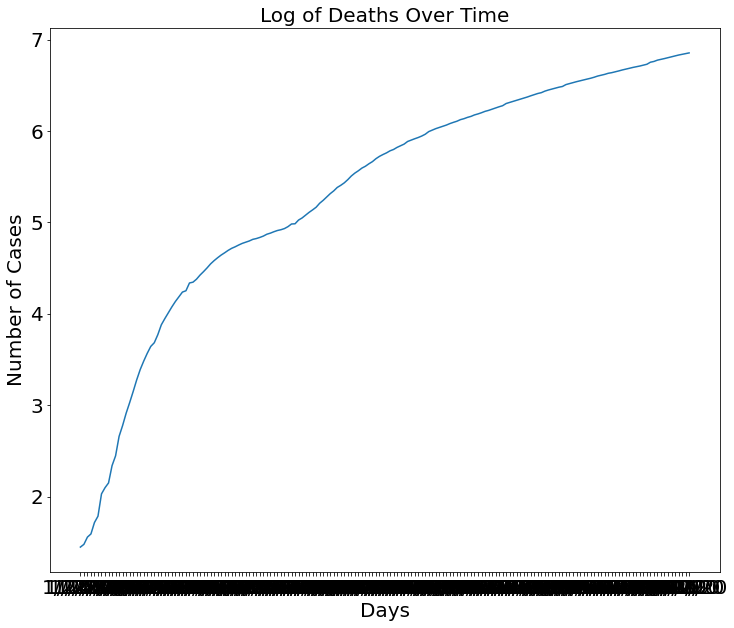

In [248]:
plt.figure(figsize=(12, 10))
plt.plot(dates, np.log10(recover))
plt.title('Log of Deaths Over Time', size=20)
plt.xlabel('Days', size=20)
plt.ylabel('Number of Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

## Country Specific Graphs of Confirmed Cases, Deaths, Recoveries 

### For USA 

In [249]:
Data_US = merged[(merged['Country/Region'] == 'US') ].reset_index(drop=True)
Data_US.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Mortality_rate,Recovery_rate
0,,US,40.0,-100.0,2020-01-22,1,0,0,1,0.0,0.0
1,,US,40.0,-100.0,2020-01-23,1,0,0,1,0.0,0.0
2,,US,40.0,-100.0,2020-01-24,2,0,0,2,0.0,0.0
3,,US,40.0,-100.0,2020-01-25,2,0,0,2,0.0,0.0
4,,US,40.0,-100.0,2020-01-26,5,0,0,5,0.0,0.0


In [250]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_US['Date'], y=Data_US['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=Data_US['Date'], y=Data_US['Active'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Data_US['Date'], y=Data_US['Deaths'],name='Deaths',
                                   marker_color='black',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Data_US['Date'], y=Data_US['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Evolution of cases over time in US',
        template='plotly_white'

)

fig.show()

In [251]:
Data_US_latest = Data_US[Data_US['Date'] == max(Data_US['Date'])].reset_index()
Data_US_latest

,index,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Mortality_rate,Recovery_rate
0,173,,US,40.0,-100.0,2020-07-13,3364157,135566,1031939,2196652,0.040297,0.306745


In [252]:
colors = ['rgb(2,58,88)','rgb(65,171,93)', 'rgb(127,0,0)']
labels = ["Active","Recovered","Deaths"]
values = Data_US_latest.loc[0, ["Active","Recovered","Deaths"]]

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

### For India 

In [253]:
Data_India = merged[(merged['Country/Region'] == 'India') ].reset_index(drop=True)
Data_India.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Mortality_rate,Recovery_rate
0,,India,20.593684,78.96288,2020-01-22,0,0,0,0,NaN,NaN
1,,India,20.593684,78.96288,2020-01-23,0,0,0,0,NaN,NaN
2,,India,20.593684,78.96288,2020-01-24,0,0,0,0,NaN,NaN
3,,India,20.593684,78.96288,2020-01-25,0,0,0,0,NaN,NaN
4,,India,20.593684,78.96288,2020-01-26,0,0,0,0,NaN,NaN


In [254]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_India['Date'], y=Data_India['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=Data_India['Date'], y=Data_India['Active'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Data_India['Date'], y=Data_India['Deaths'],name='Deaths',
                                   marker_color='black',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Data_India['Date'], y=Data_India['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Evolution of cases over time in US',
        template='plotly_white'

)

fig.show()

In [255]:
Data_India_latest = Data_India[Data_India['Date'] == max(Data_India['Date'])].reset_index()
Data_India_latest

,index,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Mortality_rate,Recovery_rate
0,173,,India,20.593684,78.96288,2020-07-13,906752,23727,571460,311565,0.026167,0.630227


In [256]:
colors = ['rgb(2,58,88)','rgb(65,171,93)', 'rgb(127,0,0)']
labels = ["Active","Recovered","Deaths"]
values = Data_India_latest.loc[0, ["Active","Recovered","Deaths"]]

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

### For Brazil

In [257]:
Data_Brazil = merged[(merged['Country/Region'] == 'Brazil') ].reset_index(drop=True)
Data_Brazil.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Mortality_rate,Recovery_rate
0,,Brazil,-14.235,-51.9253,2020-01-22,0,0,0,0,NaN,NaN
1,,Brazil,-14.235,-51.9253,2020-01-23,0,0,0,0,NaN,NaN
2,,Brazil,-14.235,-51.9253,2020-01-24,0,0,0,0,NaN,NaN
3,,Brazil,-14.235,-51.9253,2020-01-25,0,0,0,0,NaN,NaN
4,,Brazil,-14.235,-51.9253,2020-01-26,0,0,0,0,NaN,NaN


In [258]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Brazil['Date'], y=Data_Brazil['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=Data_Brazil['Date'], y=Data_Brazil['Active'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Data_Brazil['Date'], y=Data_Brazil['Deaths'],name='Deaths',
                                   marker_color='black',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Data_Brazil['Date'], y=Data_Brazil['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Evolution of cases over time in US',
        template='plotly_white'

)

fig.show()

In [259]:
Data_Brazil_latest = Data_Brazil[Data_Brazil['Date'] == max(Data_Brazil['Date'])].reset_index()
Data_Brazil_latest

,index,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Mortality_rate,Recovery_rate
0,173,,Brazil,-14.235,-51.9253,2020-07-13,1884967,72833,1291251,520883,0.038639,0.685026


In [260]:
colors = ['rgb(2,58,88)','rgb(65,171,93)', 'rgb(127,0,0)']
labels = ["Active","Recovered","Deaths"]
values = Data_Brazil_latest.loc[0, ["Active","Recovered","Deaths"]]

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

## Prediction for confirmed cases, Deaths and Recoveries Worldwide

#### Prediction for confirmed cases

In [298]:
confirmed = merged.groupby('Date').sum()['Confirmed'].reset_index()

In [299]:
confirmed.columns = ['ds','y'] #'ds' is the timestamp and 'y' is the numeric measurement that we wish to forecast

In [300]:
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [301]:
confirmed.head() #Time stamp

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [302]:
from fbprophet import Prophet

In [303]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=60) #Forecasting for next 60 days(UPTO SEPTEMBER)
future_deaths = future.copy() 
future.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [327]:
forecast = m.predict(future)
forecast[['ds','yhat_upper']].head(10) #"Yhat_upper" is the prediction of confirmed cases 

,ds,yhat_upper
0,2020-01-22,102266.447819
1,2020-01-23,117611.901481
2,2020-01-24,119793.007518
3,2020-01-25,123213.012806
4,2020-01-26,127023.520552
5,2020-01-27,131366.902728
6,2020-01-28,112370.188404
7,2020-01-29,116986.532271
8,2020-01-30,123987.738083
9,2020-01-31,124218.537346


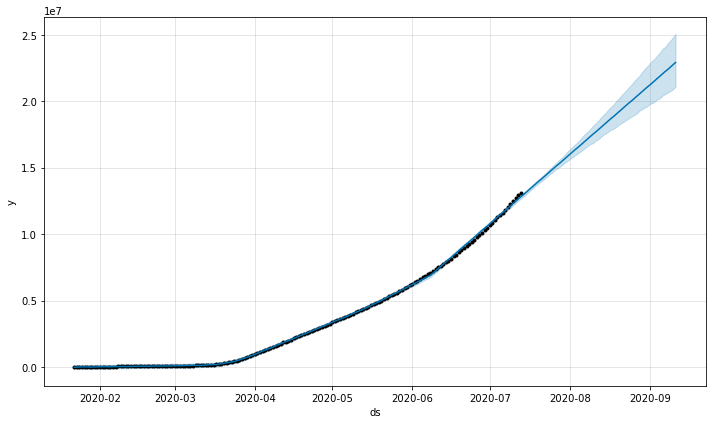

In [305]:
confirmed_forecast_plot = m.plot(forecast)

### <font color = red> The black dots are original values and Blue lines are the forecasted(predicted) values. 

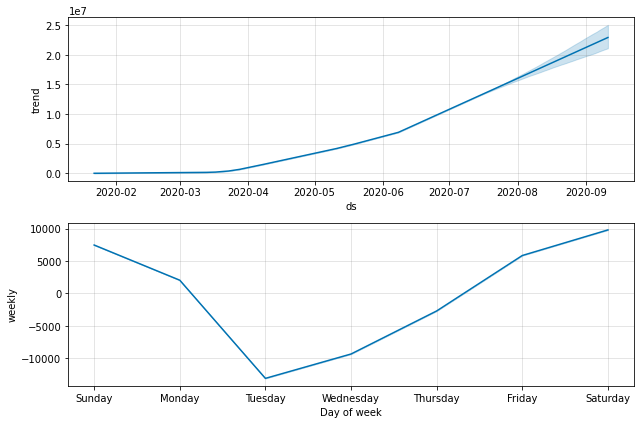

In [306]:
forecast_components = m.plot_components(forecast)

### <font color = red> The number of cases on Tuesday is less and then there is a sharp increase until Sunday. The cases will continue rising.

### Prediction for Deaths: 

In [307]:
deaths_pred = merged.groupby('Date').sum()['Deaths'].reset_index()

In [308]:
deaths_pred.columns = ['ds','y']

In [309]:
deaths_pred['ds'] = pd.to_datetime(deaths_pred['ds'])

In [310]:
m = Prophet(interval_width=0.95)
m.fit(deaths_pred)
future = m.make_future_dataframe(periods=60) #Prediction for next 60 days
future_deaths = future.copy() 
future.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [311]:
forecast = m.predict(future)
forecast[['ds','yhat_upper']].head() 

,ds,yhat_upper
0,2020-01-22,970.009525
1,2020-01-23,1441.255023
2,2020-01-24,1832.672609
3,2020-01-25,1722.527455
4,2020-01-26,944.208441


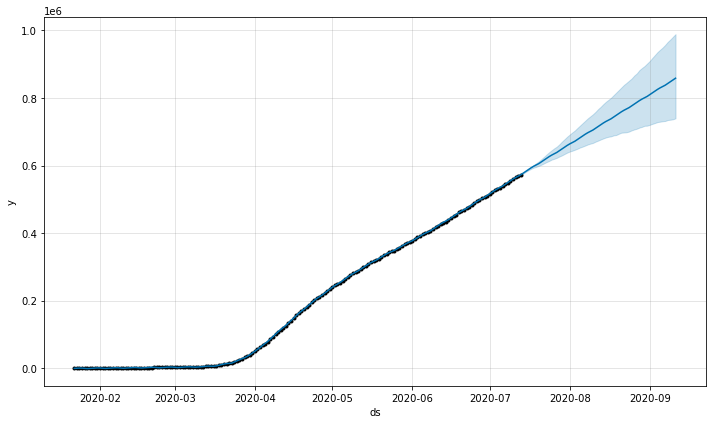

In [312]:
deaths_forecast_plot = m.plot(forecast)

### <font color = red> The Black dots are original deaths and Blue line is for Predicted deaths

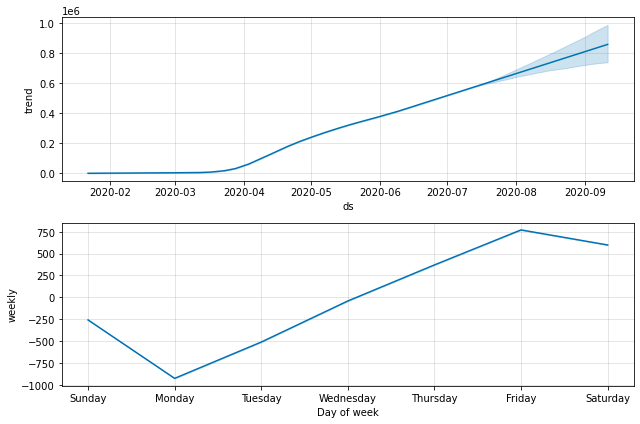

In [313]:
forecast_components = m.plot_components(forecast)

### <font color = blue> It is clearly evident that the number of deaths are higher in weekdays

### Prediction for recoveries: 

In [314]:
recovery_pred = merged.groupby('Date').sum()['Recovered'].reset_index()

In [315]:
recovery_pred.columns = ['ds','y']

In [316]:
recovery_pred['ds'] = pd.to_datetime(recovery_pred['ds'])

In [317]:
m = Prophet(interval_width=0.95)
m.fit(recovery_pred)
future = m.make_future_dataframe(periods=60) #Prediction of recoveries from next 60 days
future_recovered = future.copy() 
future.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [318]:
forecast = m.predict(future)
forecast[['ds','yhat_upper']].head()


,ds,yhat_upper
0,2020-01-22,115340.872169
1,2020-01-23,105790.703186
2,2020-01-24,123710.644903
3,2020-01-25,121128.327674
4,2020-01-26,123800.968888


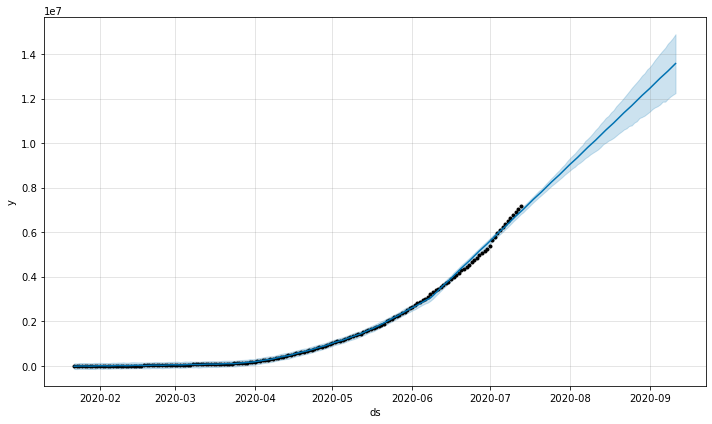

In [319]:
recovered_forecast_plot = m.plot(forecast)

### <font color = green> Black dots are original values and Blue line is predicted. Stong cohesion is observed here in the trend between black dots and blue line.

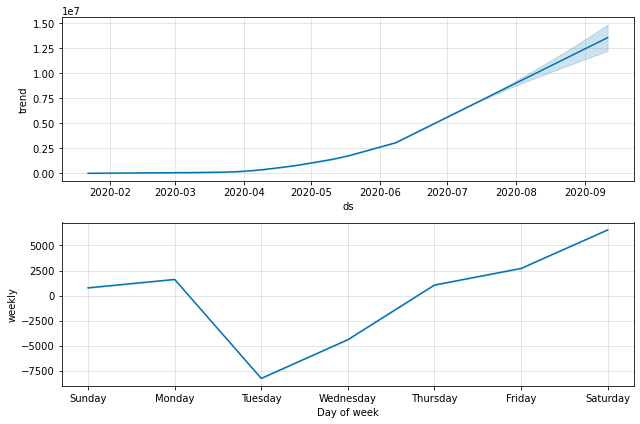

In [320]:
forecast_components = m.plot_components(forecast)

### <font color = green> The recovery cases are most in Saturdays and lowest in Tuesday